In [1]:
import sqlite3

# Connect to SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Extended sample data
sales_data = [
    ('Product A', 30, 10.0),
    ('Product B', 20, 15.0),
    ('Product C', 50, 8.0),
    ('Product D', 10, 20.0),
    ('Product E', 40, 12.0),
    ('Product A', 25, 10.0),
    ('Product B', 15, 15.0),
    ('Product F', 60, 9.0),
    ('Product G', 33, 11.0),
    ('Product C', 20, 8.0),
    ('Product D', 12, 20.0),
    ('Product E', 35, 12.0),
    ('Product F', 50, 9.0),
    ('Product G', 25, 11.0),
    ('Product H', 45, 14.0),
    ('Product I', 38, 13.0),
    ('Product J', 28, 16.0),
]

# Insert the extended data
cursor.executemany('''
    INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
''', sales_data)

# Commit and close
conn.commit()
conn.close()


In [6]:
df.head(10)

,product,total_qty,revenue
0,Product A,55,550.0
1,Product B,35,525.0
2,Product C,70,560.0
3,Product D,22,440.0
4,Product E,75,900.0
5,Product F,110,990.0
6,Product G,58,638.0
7,Product H,45,630.0
8,Product I,38,494.0
9,Product J,28,448.0


In [7]:
df.describe()

,total_qty,revenue
count,10.000000,10.000000
mean,53.600000,617.500000
std,26.344723,185.905143
min,22.000000,440.000000
25%,35.750000,501.750000
50%,50.000000,555.000000
75%,67.000000,636.000000
max,110.000000,990.000000


     product  total_qty  revenue
0  Product A         55    550.0
1  Product B         35    525.0
2  Product C         70    560.0
3  Product D         22    440.0
4  Product E         75    900.0
5  Product F        110    990.0
6  Product G         58    638.0
7  Product H         45    630.0
8  Product I         38    494.0
9  Product J         28    448.0


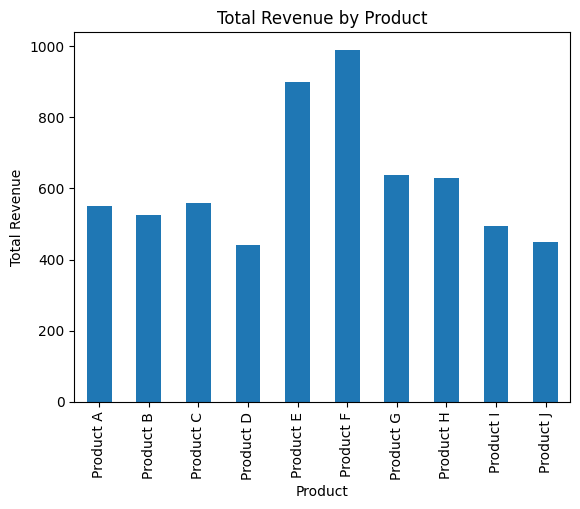

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('sales_data.db')

# Run the SQL query to get total quantity and total revenue by product
query = '''
    SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
'''
df = pd.read_sql_query(query, conn)

# Print the dataframe (sales summary)
print(df)

# Plot the results in a bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)

# Display the chart
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()

# Optionally save the chart as a PNG file
# plt.savefig("sales_chart.png")

# Close the database connection
conn.close()


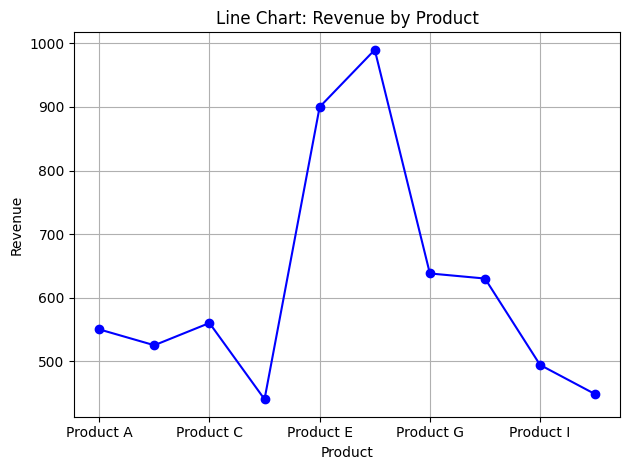

In [8]:
import matplotlib.pyplot as plt

# Line chart for revenue by product
df.sort_values('product').plot(kind='line', x='product', y='revenue', marker='o', color='blue', legend=False)
plt.title('Line Chart: Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.savefig("line_chart.png")
plt.show()


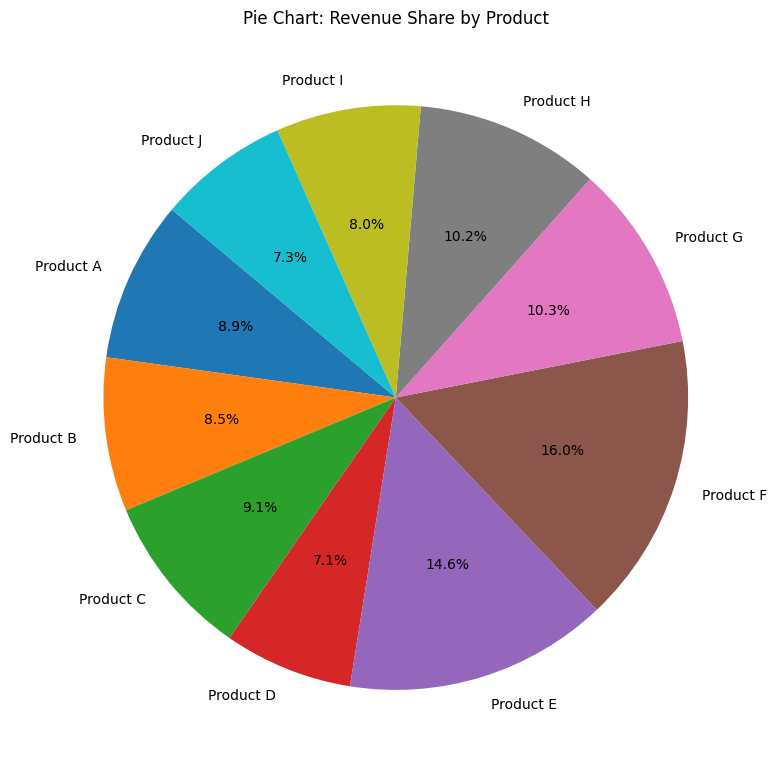

In [9]:
# Pie chart for revenue share
plt.figure(figsize=(8, 8))
plt.pie(df['revenue'], labels=df['product'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Revenue Share by Product')
plt.tight_layout()
plt.savefig("pie_chart.png")
plt.show()


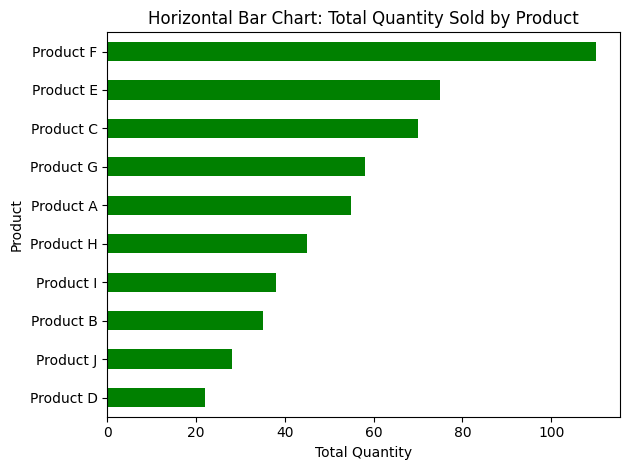

In [10]:
# Horizontal bar chart for total quantity sold
df.sort_values('total_qty').plot(kind='barh', x='product', y='total_qty', legend=False, color='green')
plt.title('Horizontal Bar Chart: Total Quantity Sold by Product')
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig("horizontal_bar_chart.png")
plt.show()


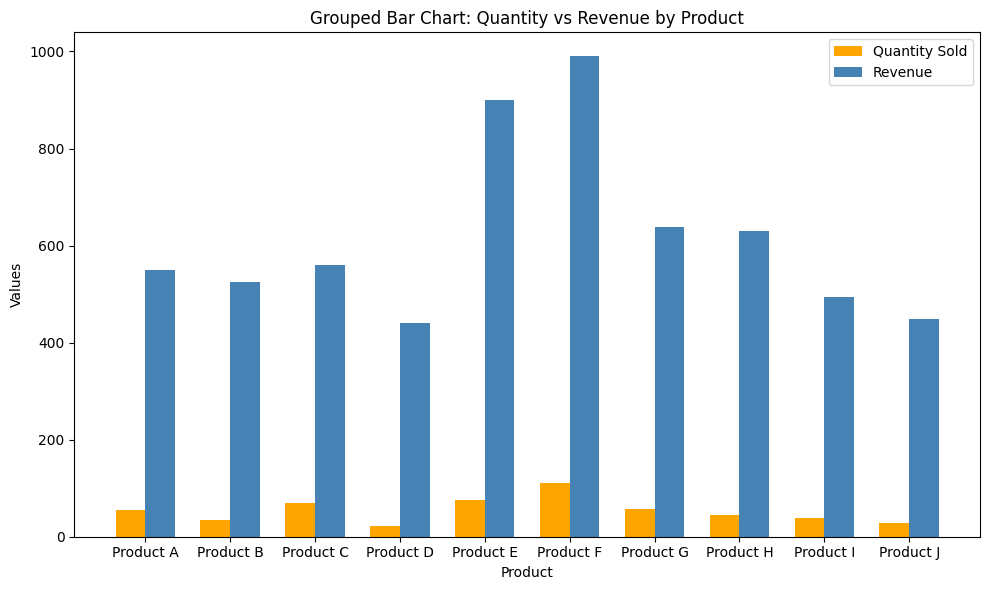

In [11]:
# Stacked bar chart showing both quantity and revenue
import numpy as np

# Create a new DataFrame for stacking
x = np.arange(len(df['product']))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df['total_qty'], width, label='Quantity Sold', color='orange')
bar2 = ax.bar(x + width/2, df['revenue'], width, label='Revenue', color='steelblue')

# Labels and formatting
ax.set_xlabel('Product')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart: Quantity vs Revenue by Product')
ax.set_xticks(x)
ax.set_xticklabels(df['product'])
ax.legend()

plt.tight_layout()
plt.savefig("grouped_bar_chart.png")
plt.show()
